100%|██████████| 5900/5900 [00:00<00:00, 18817.25it/s]


Images:  (5900, 224, 128, 3)
Labels:  (5900, 2)


/opt/conda/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/30
166/166 [==============================] - 33s 152ms/step - loss: 0.4961 - accuracy: 0.7603 - val_loss: 0.6443 - val_accuracy: 0.6000
Epoch 2/30
166/166 [==============================] - 22s 130ms/step - loss: 0.3416 - accuracy: 0.8544 - val_loss: 0.5465 - val_accuracy: 0.8373
Epoch 3/30
166/166 [==============================] - 21s 127ms/step - loss: 0.2909 - accuracy: 0.8787 - val_loss: 0.4284 - val_accuracy: 0.8119
Epoch 4/30
166/166 [==============================] - 22s 131ms/step - loss: 0.2406 - accuracy: 0.9013 - val_loss: 0.3471 - val_accuracy: 0.8644
Epoch 5/30
166/166 [==============================] - 21s 127ms/step - loss: 0.2182 - accuracy: 0.9136 - val_loss: 0.2591 - val_accuracy: 0.8847
Epoch 6/30
166/166 [==============================] - 21s 128ms/step - loss: 0.1862 - accuracy: 0.9254 - val_loss: 0.5605 - val_accuracy: 0.7746
Epoch 7/30
166/166 [==============================] - 21s 128ms/step - loss: 0.1626 - accuracy: 0.9360 - val_loss: 0.2584 - val_ac

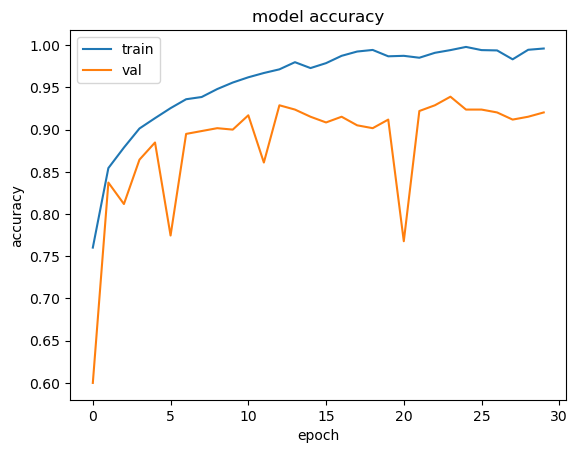

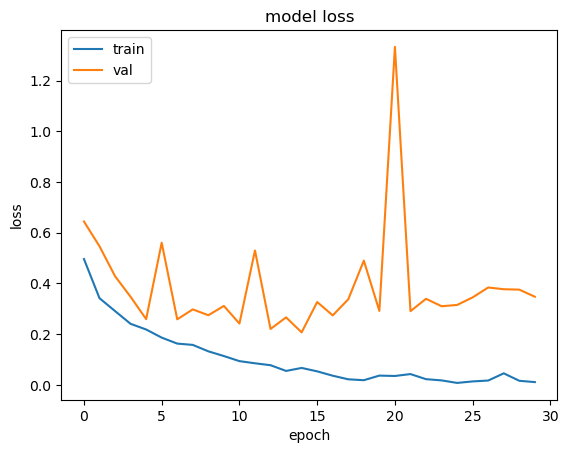

100%|██████████| 2400/2400 [00:22<00:00, 104.48it/s]


Images:  (2400, 224, 128, 3)
Labels:  (2400, 2)
Count:  2400
75/75 [==============================] - 3s 38ms/step
[0 0 0 ... 0 1 1]
[0 0 0 ... 0 1 0]
Accuracy:  0.8675
              precision    recall  f1-score   support

           0       0.96      0.81      0.88      1441
           1       0.77      0.95      0.85       959

    accuracy                           0.87      2400
   macro avg       0.87      0.88      0.87      2400
weighted avg       0.89      0.87      0.87      2400



In [1]:
import numpy as np
import cv2
import os
import csv
import matplotlib.pyplot as plt
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score, log_loss, f1_score, precision_score, recall_score, confusion_matrix, classification_report
from tqdm import tqdm
# from VggModel import Model
# import Model
# from new_vgg import Model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, AveragePooling2D
from keras.optimizers import Adam
from keras.utils import to_categorical
import pandas as pd

# necessary import for train_test_split
from sklearn.model_selection import train_test_split




# design a VGG16 model

class vgg_model:

    def __init__(self, input_shape, classes):
        
        # input_shape = (128, 128, 3)

        model = Sequential(name='VGG')

        # Block 1 has 3 layers: 2 Conv2D and 1 MaxPooling2D
        # output shape after block 1: (112, 64, 64)
        model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
        model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
        model.add(MaxPooling2D((2, 2), strides=(2, 2)))

        # Block 2 has 3 layers: 2 Conv2D and 1 MaxPooling2D
        # output shape after block 2: (56, 32, 128)
        model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
        model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
        model.add(MaxPooling2D((2, 2), strides=(2, 2)))

        # Block 3 has 4 layers: 3 Conv2D and 1 MaxPooling2D
        # output shape after block 3: (28, 16, 256)
        model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
        model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
        model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
#         model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
        model.add(MaxPooling2D((2, 2), strides=(2, 2)))

        # Block 4 has 4 layers: 3 Conv2D and 1 MaxPooling2D
        # output shape after block 4: (14, 8, 512)
        model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
        model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
        model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
#         model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
        model.add(MaxPooling2D((2, 2), strides=(2, 2)))

        # Block 5 has 4 layers: 3 Conv2D and 1 MaxPooling2D
        # output shape after block 5: (7, 4, 512)
        model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
        model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
        model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
#         model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
        model.add(MaxPooling2D((2, 2), strides=(2, 2)))

        # Block 6 has  layers: 3 Conv2D and 1 MaxPooling2D
        # output shape after block 6: (3, 2, 512)
        # model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
        # model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
        # model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
#         model.add(MaxPooling2D((2, 2), strides=(2, 2)))

        # FC block has 6 layers: BatchNormalization, AveragePooling2D, Flatten, Dense, Dropout, Dense
        
        # BatchNormalization layer; output shape: (7, 4, 512)
        model.add(BatchNormalization())
        # AveragePooling2D layer; output shape: (3, 2, 512)
        model.add(AveragePooling2D((2, 2)))
        # Flatten layer; output shape: (3*2*512)
        model.add(Flatten())
        # Dense layer; output shape: (1024)
        model.add(Dense(1024, activation='relu'))
        # Dropout layer; output shape: (1024)
        model.add(Dropout(0.2))
        # Dense layer; output shape: (classes)
        model.add(Dense(classes, activation='softmax'))
        

        # compile the model
        model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

        self.model = model

    def summary(self):
        self.model.summary()

    def fit(self, x_train, y_train, x_val, y_val, batch_size, epochs):
        return self.model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

    def evaluate(self, x_test, y_test):
        return self.model.evaluate(x_test, y_test)

    def predict(self, x_test):
        return self.model.predict(x_test)



number_of_images = 5900
epochs = 30
batch_size = 32
input_shape=(224, 128, 3)
classes=2
number_of_test_images = 2400


# write a function to load the images, the function will have 2 parameters: the path to the images and the number of images\
# the function will return a numpy array of images

def load_images(path, number_of_images):
    images = np.zeros((number_of_images, 224, 128, 3))
    for i in tqdm(range(number_of_images)):

        # check if the image is valid, if it is not valid, skip it
        if not os.path.isfile(path + str(i) + '.jpg'):
            continue

        img = cv2.imread(path + str(i) + '.jpg')
        img = cv2.resize(img, (128, 224))
        images[i] = img

    return images




# write a function to train the model
# the function has 5 parameters: the model, the images, the labels, the batch size and the number of epochs
# the function will write the training history to a csv file
# the function will return the model

def train(model, images, labels, batch_size, epochs):
    # split the data into training and validation sets
    x_train, x_val, y_train, y_val = train_test_split(images, labels, test_size=0.1, random_state=42)
    # train the model
    history = model.fit(x_train, y_train, x_val, y_val, batch_size, epochs)
    # write the training history to a csv file
    pd.DataFrame(history.history).to_csv('/kaggle/working/history.csv')

    # plot the training history (training accuracy and validation accuracy)
    # save the plot in a png file
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.savefig('/kaggle/working/accuracy.png')
    plt.show()

    # plot the training history (training loss and validation loss)
    # save the plot in a png file
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.savefig('/kaggle/working/loss.png')
    plt.show()
    
    return model


train_directory = '/kaggle/input/data-with-6000/Combined/train'
test_directory = '/kaggle/input/data-with-6000/Combined/test'


# use the "train_labels.csv" file to load the images, the first column is the image name and the second column is the corresponding label
# the images will have path: "train_directory + image_name"
# the labels will be the second column of the csv file

train_labels = pd.read_csv('/kaggle/input/data-with-6000/Combined/train_labels.csv')

# load the images serially from reading the csv file and save the names of the images in a list

image_names = []

images = np.zeros((number_of_images, 224, 128, 3))
for i in tqdm(range(number_of_images)):

    # check if the image is valid, if it is not valid, skip it
    if not os.path.isfile(train_directory + '/' + train_labels.iloc[i, 0]):
        continue

    img = cv2.imread(train_directory + '/' + train_labels.iloc[i, 0])
    img = cv2.resize(img, (128, 224))
    
    # normalize the images
    img = img / 255.0

    images[i] = img

    image_names.append(train_labels.iloc[i, 0])



# load the labels serially from reading the csv file
# perform one-hot encoding on the labels, 'person' will be [0, 1] and 'non-person' will be [1, 0]
# save the labels in a list

person_noPerson_list = []

labels = np.zeros((number_of_images, 2))
for i in tqdm(range(number_of_images)):
    if train_labels.iloc[i, 1] == 'person':
        labels[i] = [0, 1]
    else:
        labels[i] = [1, 0]

    person_noPerson_list.append(train_labels.iloc[i, 1])


# print the shape of the images and labels
print('Images: ', images.shape)
print('Labels: ', labels.shape)

# print all the labels
# print(labels)


# print image names and labels
# for i in range(number_of_images):
#     print(image_names[i], person_noPerson_list[i])

# create an instance of the model
model = vgg_model(input_shape, classes)

# model.summary()

# train the model and plot the training accuracy and validation accuracy
model = train(model, images, labels, batch_size, epochs)



######################### TESTING #############################
# test the model using the test data and predict the labels
test_labels = pd.read_csv('/kaggle/input/data-with-6000/Combined/test_labels.csv')

# load the images serially from reading the csv file and save the names of the images in a list

test_image_names = []

test_images = np.zeros((number_of_test_images, 224, 128, 3))
labels = np.zeros((number_of_test_images, 2))
count = 0

for i in tqdm(range(number_of_test_images)):
    # check if the image is valid, if it is not valid, skip it
    if not os.path.isfile(test_directory + '/' + test_labels.iloc[i, 0]):
        continue
        
    # print(test_directory + '/' + test_labels.iloc[i, 0])
    img = cv2.imread(test_directory + '/' + test_labels.iloc[i, 0])

    if img is not None:

        count += 1

        img = cv2.resize(img, (128, 224))
        
        # normalize the images
        img = img / 255.0

        test_images[i] = img

        # test_image_names.append(test_labels.iloc[i, 0])

        if test_labels.iloc[i, 1] == 'person':
            labels[i] = [0, 1]
        else:
            labels[i] = [1, 0]

        # test_person_noPerson_list.append(test_labels.iloc[i, 1])

    

# load the labels serially from reading the csv file
# perform one-hot encoding on the labels, 'person' will be [0, 1] and 'non-person' will be [1, 0]
# save the labels in a list

# test_person_noPerson_list = []


# for i in tqdm(range(number_of_test_images)):
#     if test_labels.iloc[i, 1] == 'person':
#         labels[i] = [0, 1]
#     else:
#         labels[i] = [1, 0]

#     test_person_noPerson_list.append(test_labels.iloc[i, 1])

# print the shape of the images and labels
print('Images: ', test_images.shape)
print('Labels: ', labels.shape)
print('Count: ', count)


# predict the labels
predictions = model.predict(test_images)


# perform one-hot encoding on the predictions

predictions = np.argmax(predictions, axis=1)

# print the predictions
print(predictions)

# perform one-hot encoding on the test labels and measure the accuracy
labels = np.argmax(labels, axis=1)

# print the test labels
print(labels)

# calculate the accuracy
accuracy = accuracy_score(labels, predictions)

# print the accuracy
print('Accuracy: ', accuracy)

# print recall, precision and f1-score
print(classification_report(labels, predictions))


